# Payments_Fraud_Detection_with_Machine_Learning

### This case requires trainees to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns.
### Following usual model development procedures, the model would be estimated on the calibration data and tested on the validation data. This case requires both statistical analysis and creativity/judgment. 

## [Read Data ]

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# ignore all warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("C:\\Users\\cprat\\Downloads\\Fraud.csv")


In [23]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### The data appears to be a tabular dataset with various columns representing different features or attributes of each data point. The first column is a unique identifier for each transaction, and the last two columns indicate whether the transaction is fraudulent or has been flagged as potentially fraudulent by the bank.

### The other columns contain information about the type of transaction (e.g., payment, transfer, cash out), the amount of money involved, the names and account balances of the originator and recipient of the transaction, and the before-and-after balances of the relevant accounts. 

## [Data Preprocessing ]

In [9]:
#Dimensions
data.shape

(6362620, 11)

In [15]:
#Missing_values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [62]:
#Datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int64   
 1   type            object  
 2   amount          float64 
 3   nameOrig        object  
 4   oldbalanceOrg   float64 
 5   newbalanceOrig  float64 
 6   nameDest        object  
 7   oldbalanceDest  float64 
 8   newbalanceDest  float64 
 9   isFraud         category
 10  isFlaggedFraud  int64   
dtypes: category(1), float64(5), int64(2), object(3)
memory usage: 491.5+ MB


### This is a really big dataset with no NULL values having size over 490MB. This would take some time to train on normally used GPU.

In [14]:
num = (data['isFraud'] == 0).sum()
num

6354407

In [20]:
num1 = (data['isFraud'] == 1).sum()
num1

8213

In [27]:
NoFraud_percent = (num / (num1 + num)) * 100
Fraud_percent = (num1 / (num1 + num)) * 100

In [25]:
NoFraud_percent

99.87091795518198

In [28]:
Fraud_percent

0.12908204481801522

<Axes: xlabel='isFraud', ylabel='count'>

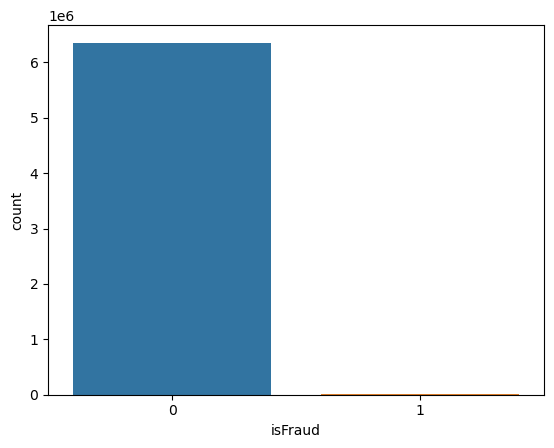

In [30]:
#Count comparison for target variable
data['isFraud']=pd.Categorical(data['isFraud'])
sns.countplot(x = 'isFraud', data =data)

### The results prove that this is a highly imbalanced dataset as Percentage of Normal transactions= 99.87 % and Percentage of Fraud transactions= 0.13 %.Which will help us in better model selection.

In [50]:
print(data['type'].value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


## [Encoding of Transaction "Type" Column]

In [51]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['type'])
print(one_hot_encoded_data)

         step      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     9839.64  C1231006815      170136.00       160296.36   
1           1     1864.28  C1666544295       21249.00        19384.72   
2           1      181.00  C1305486145         181.00            0.00   
3           1      181.00   C840083671         181.00            0.00   
4           1    11668.14  C2048537720       41554.00        29885.86   
...       ...         ...          ...            ...             ...   
6362615   743   339682.13   C786484425      339682.13            0.00   
6362616   743  6311409.28  C1529008245     6311409.28            0.00   
6362617   743  6311409.28  C1162922333     6311409.28            0.00   
6362618   743   850002.52  C1685995037      850002.52            0.00   
6362619   743   850002.52  C1280323807      850002.52            0.00   

            nameDest  oldbalanceDest  newbalanceDest isFraud  isFlaggedFraud  \
0        M1979787155            0.00       

In [55]:
type_encoded = pd.get_dummies(data[['type']])
df = pd.concat([data,type_encoded],1)
df.drop('type',1,inplace=True)

In [56]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1


## [Outlier_Detection] 

In [45]:
def outliers_det(col):
    '''Distribution and Boxplot for Outlier Detection'''
    import random
    color = random.choice(['r', 'g', 'b'])
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(col, ax=ax[0], color=color)
    sns.boxplot(col, ax=ax[1], color=color)
    plt.suptitle('Distribution & Boxplot for Outlier Detection')
    fig.show()
    return None

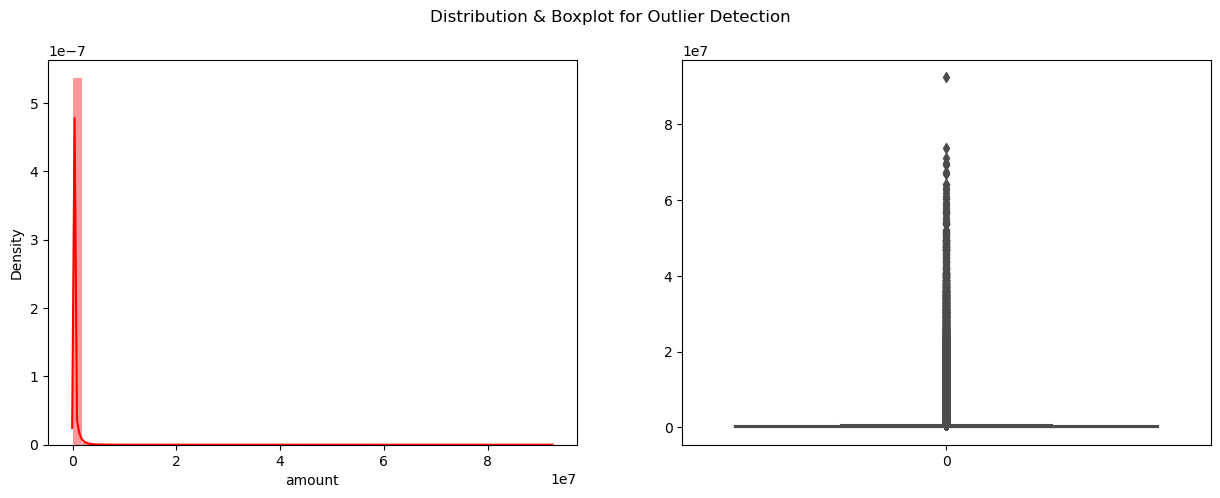

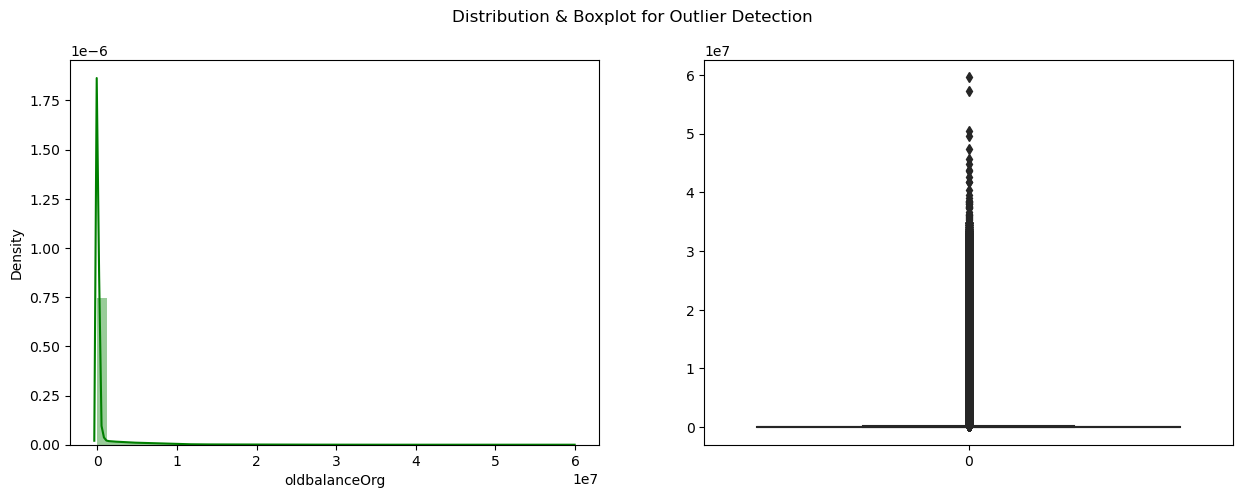

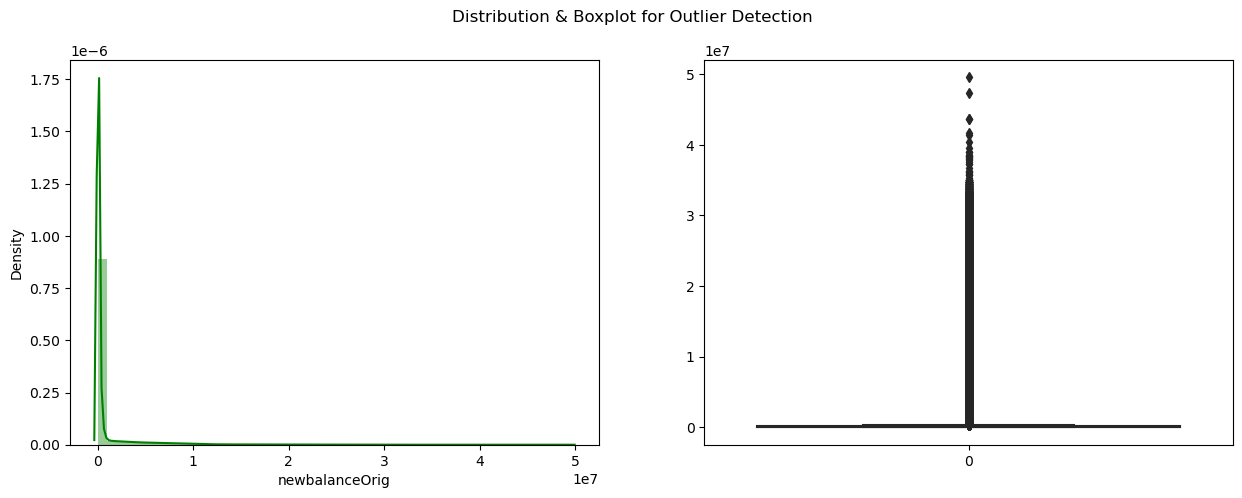

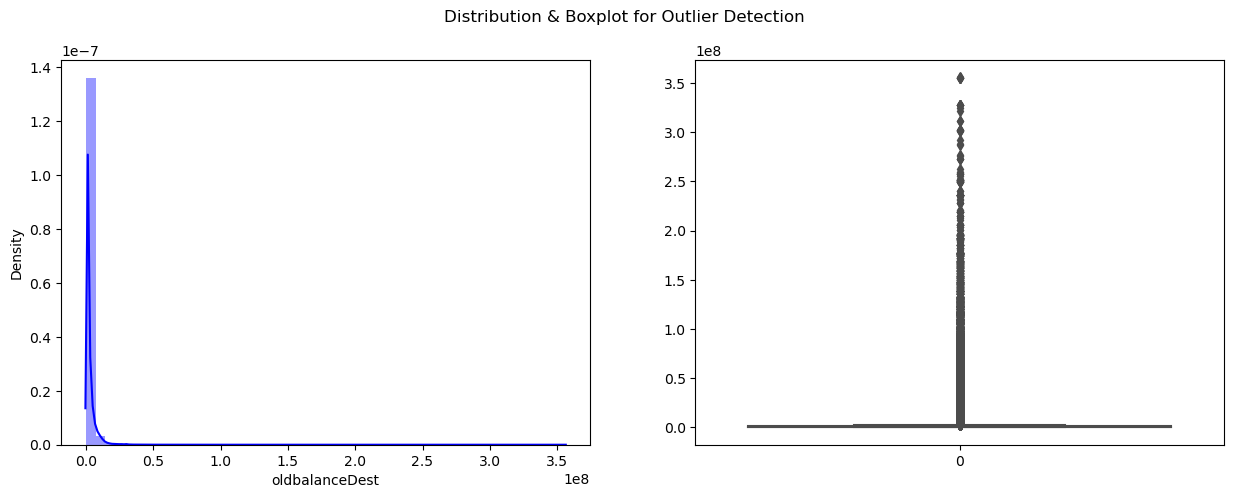

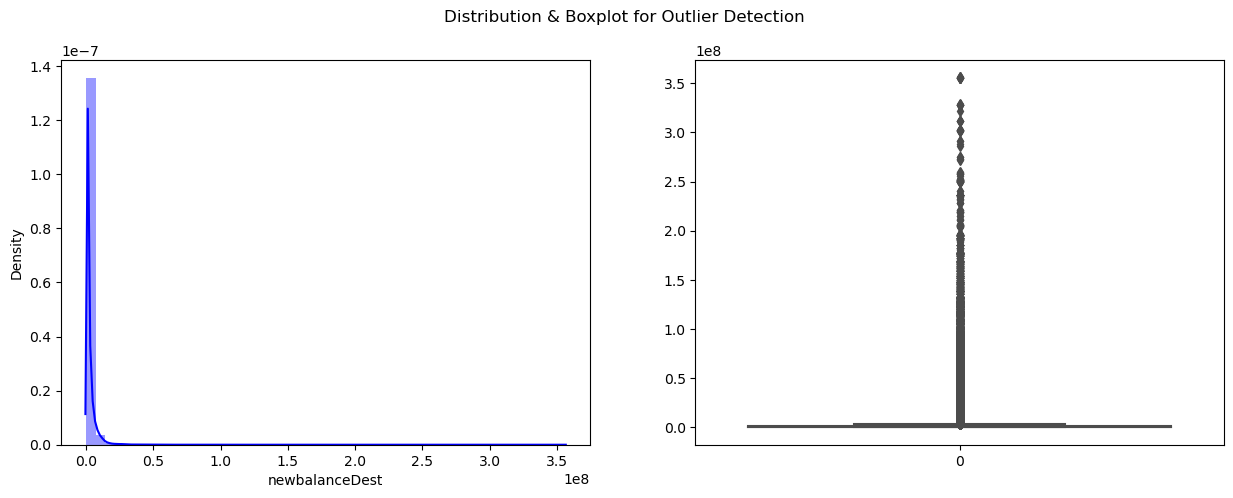

In [59]:
for col in ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']:
    outliers_det(df[col])

In [65]:
# Merchants
M = df[df['nameDest'].str.contains('M')]
M.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0
5,1,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0,0,0,0,1,0
6,1,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0,0,0,0,1,0


#### For merchants there is no information regarding the attributes "oldbalanceDest" and "newbalanceDest". This is because the transactions involving merchants are usually not depositing money into their account but rather to their Point Of Sale (POS) devices. Therefore, their account balances are not updated. As a result, these attributes are not meaningful for transactions involving merchants.

# [Using Correlation for Feature Selection]

In [66]:
# Checking how many attributes are dtype: object

objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['nameOrig', 'nameDest'], dtype='object')


### We Need To Label Encode Them In Order To Check Multicolinearity.

In [67]:
#Label Encoding for object for conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int64   
 1   amount          float64 
 2   nameOrig        int32   
 3   oldbalanceOrg   float64 
 4   newbalanceOrig  float64 
 5   nameDest        int32   
 6   oldbalanceDest  float64 
 7   newbalanceDest  float64 
 8   isFraud         category
 9   isFlaggedFraud  int64   
 10  type_CASH_IN    uint8   
 11  type_CASH_OUT   uint8   
 12  type_DEBIT      uint8   
 13  type_PAYMENT    uint8   
 14  type_TRANSFER   uint8   
dtypes: category(1), float64(5), int32(2), int64(2), uint8(5)
memory usage: 424.8 MB


In [68]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,0,0,0,1,0


In [75]:
cols = ['amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']
df_subset = df[cols]

# Calculate correlation matrix
corr = df_subset.corr()
corr

,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
amount,1.000000,0.000124,-0.002762,-0.007861,-0.169150,0.294137,0.459304,0.012295
nameOrig,0.000124,1.000000,-0.000648,-0.000675,-0.000256,0.000245,0.000255,0.000667
oldbalanceOrg,-0.002762,-0.000648,1.000000,0.998803,-0.162688,0.066243,0.042029,0.003835
newbalanceOrig,-0.007861,-0.000675,0.998803,1.000000,-0.166489,0.067812,0.041837,0.003776
nameDest,-0.169150,-0.000256,-0.162688,-0.166489,1.000000,-0.198119,-0.203992,-0.001122
oldbalanceDest,0.294137,0.000245,0.066243,0.067812,-0.198119,1.000000,0.976569,-0.000513
newbalanceDest,0.459304,0.000255,0.042029,0.041837,-0.203992,0.976569,1.000000,-0.000529
isFlaggedFraud,0.012295,0.000667,0.003835,0.003776,-0.001122,-0.000513,-0.000529,1.000000


<Axes: >

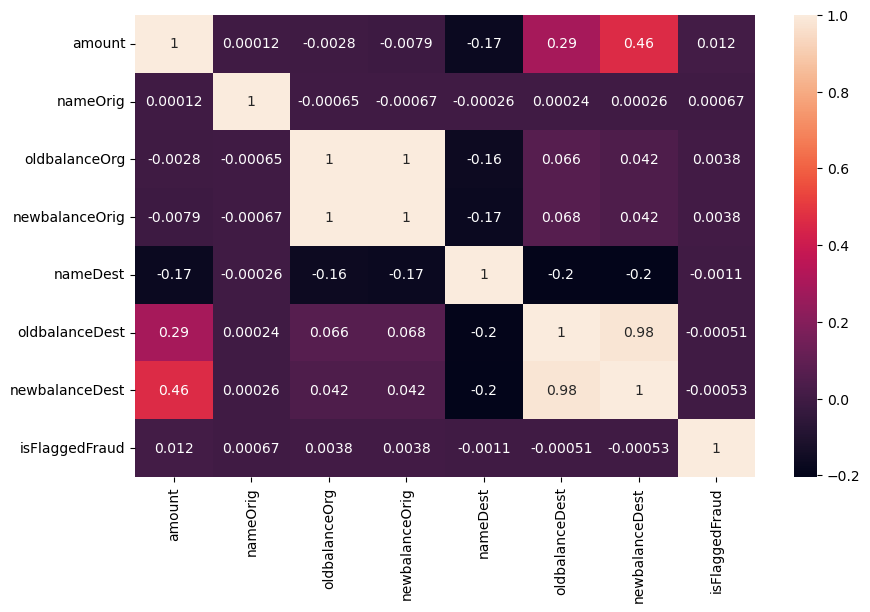

In [76]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

### We can see that oldbalanceOrg and newbalanceOrig are highly correlated. Similarly oldbalanceDest and newbalanceDest.Thus we drop the individual ones and combine them in a way such that they are useful for our analysis.

In [84]:
#First creating a copy of original dataset for further steps 

new_df1=df.copy()
new_df1.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,0,0,0,1,0


In [ ]:
new_df1['Real[Diff]_Amount_Orig'] = new_df1.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df1['Real[Diff]_Amount_Dest'] = new_df1.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)

#Dropping columns
new_df1 = new_df1.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step'],axis=1)


In [89]:
new_df1.head()

,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Real[Diff]_Amount_Orig,Real[Diff]_Amount_Dest
0,9839.64,757869,1662094,0,0,0,0,0,1,0,9839.64,0.0
1,1864.28,2188998,1733924,0,0,0,0,0,1,0,1864.28,0.0
2,181.00,1002156,439685,1,0,0,0,0,0,1,181.00,0.0
3,181.00,5828262,391696,1,0,0,1,0,0,0,181.00,21182.0
4,11668.14,3445981,828919,0,0,0,0,0,1,0,11668.14,0.0


In [90]:
new_df1

,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Real[Diff]_Amount_Orig,Real[Diff]_Amount_Dest
0,9839.64,757869,1662094,0,0,0,0,0,1,0,9839.64,0.00
1,1864.28,2188998,1733924,0,0,0,0,0,1,0,1864.28,0.00
2,181.00,1002156,439685,1,0,0,0,0,0,1,181.00,0.00
3,181.00,5828262,391696,1,0,0,1,0,0,0,181.00,21182.00
4,11668.14,3445981,828919,0,0,0,0,0,1,0,11668.14,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,5651847,505863,1,0,0,1,0,0,0,339682.13,-339682.13
6362616,6311409.28,1737278,260949,1,0,0,0,0,0,1,6311409.28,0.00
6362617,6311409.28,533958,108224,1,0,0,1,0,0,0,6311409.28,-6311409.27
6362618,850002.52,2252932,319713,1,0,0,0,0,0,1,850002.52,0.00


In [93]:
cols = ['amount','nameOrig','Real[Diff]_Amount_Orig','Real[Diff]_Amount_Dest','nameDest','isFraud','isFlaggedFraud']
df_subset1 = new_df1[cols]

# Calculate correlation matrix
corr2 = df_subset1.corr()
corr2

,amount,nameOrig,Real[Diff]_Amount_Orig,Real[Diff]_Amount_Dest,nameDest,isFlaggedFraud
amount,1.000000,0.000124,0.102337,-0.845964,-0.169150,0.012295
nameOrig,0.000124,1.000000,0.000686,-0.000130,-0.000256,0.000667
Real[Diff]_Amount_Orig,0.102337,0.000686,1.000000,-0.169292,0.115505,0.000230
Real[Diff]_Amount_Dest,-0.845964,-0.000130,-0.169292,1.000000,0.093551,0.000242
nameDest,-0.169150,-0.000256,0.115505,0.093551,1.000000,-0.001122
isFlaggedFraud,0.012295,0.000667,0.000230,0.000242,-0.001122,1.000000


<Axes: >

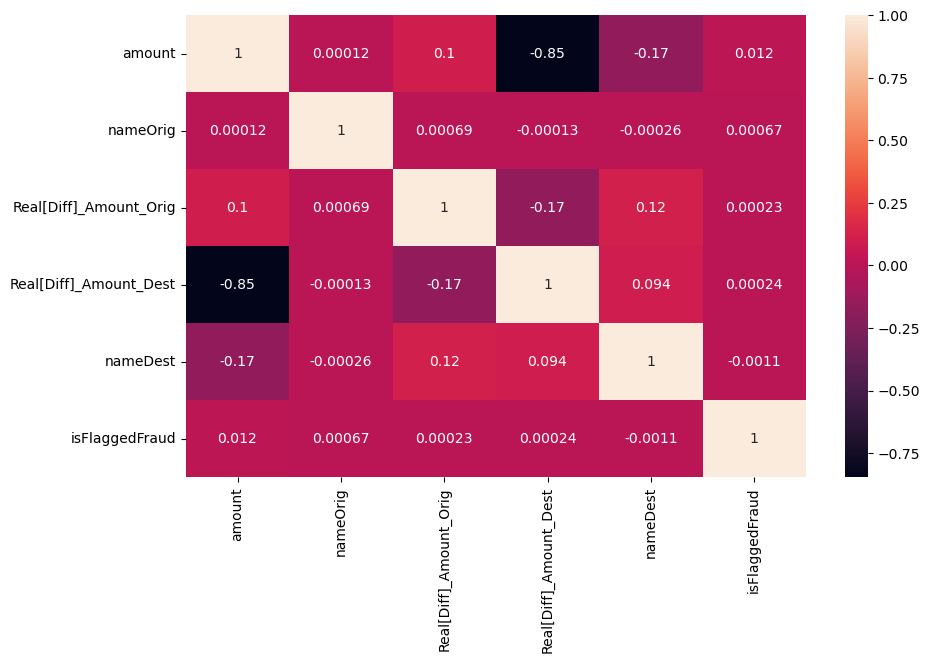

In [94]:
plt.figure(figsize=(10,6))
sns.heatmap(corr2,annot=True)

## [Model Building]

### Ensemble techniques can be effective for imbalanced datasets because they can help reduce the variance of the model and improve generalization.

In [151]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from imblearn.combine import SMOTEENN

In [119]:
# Perform Scaling
scaler = StandardScaler()
new_df1["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df1.drop(["amount"], inplace= True, axis= 1)

Y = new_df1["isFraud"]
X = new_df1.drop(["isFraud","nameOrig","nameDest"],axis= 1)

In [121]:
new_df1

,nameOrig,nameDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Real[Diff]_Amount_Orig,Real[Diff]_Amount_Dest,NormalizedAmount
0,757869,1662094,0,0,0,0,0,1,0,9839.64,0.00,-0.281560
1,2188998,1733924,0,0,0,0,0,1,0,1864.28,0.00,-0.294767
2,1002156,439685,1,0,0,0,0,0,1,181.00,0.00,-0.297555
3,5828262,391696,1,0,0,1,0,0,0,181.00,21182.00,-0.297555
4,3445981,828919,0,0,0,0,0,1,0,11668.14,0.00,-0.278532
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,5651847,505863,1,0,0,1,0,0,0,339682.13,-339682.13,0.264665
6362616,1737278,260949,1,0,0,0,0,0,1,6311409.28,0.00,10.153953
6362617,533958,108224,1,0,0,1,0,0,0,6311409.28,-6311409.27,10.153953
6362618,2252932,319713,1,0,0,0,0,0,1,850002.52,0.00,1.109765


In [123]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.25, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4771965, 9)
Shape of X_test:  (1590655, 9)


Confusion matrix of Decision Tree model is: 
 [[1587969     641]
 [    578    1467]]


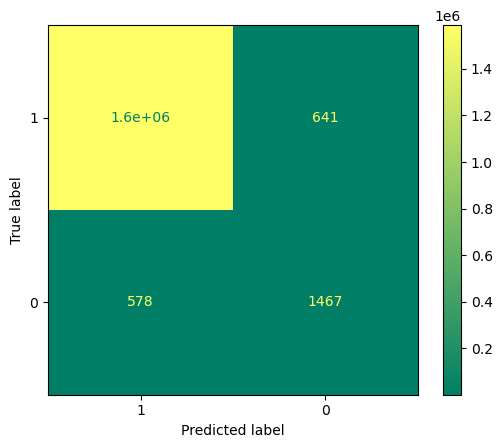

In [146]:

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

map = 'summer'
display_labels=['1','0']
cm = confusion_matrix(Y_test,Y_pred_dt)
print("Confusion matrix of Decision Tree model is: \n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()          

Confusion matrix of Random Forest model is: 
 [[1588088     522]
 [    578    1467]]


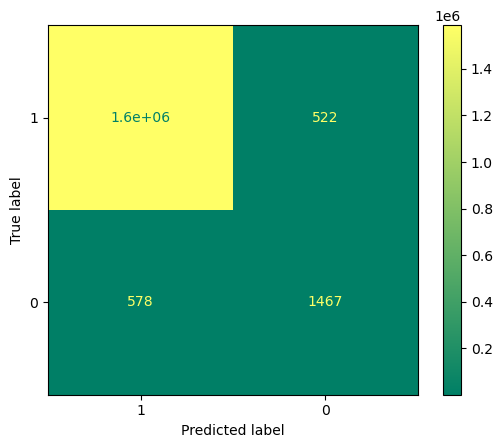

In [147]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

map = 'summer'
display_labels=['1','0']
cmR = confusion_matrix(Y_test,Y_pred_rf)
print("Confusion matrix of Random Forest model is: \n", cmR)

disp = ConfusionMatrixDisplay(confusion_matrix=cmR, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

Confusion matrix of AdaBoost model is: 
 [[1588385     225]
 [    759    1286]]


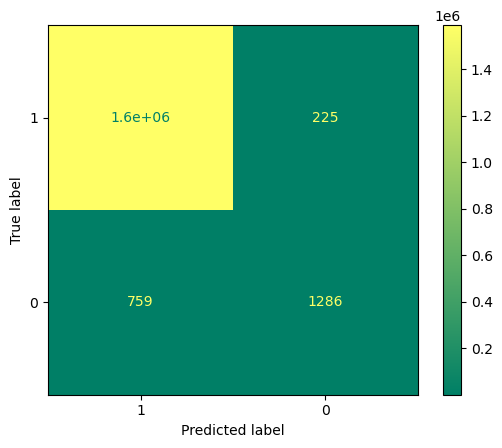

In [158]:
AdaB = AdaBoostClassifier()
AdaB.fit(X_train, Y_train)

Y_pred_Ad = AdaB.predict(X_test)
adaboost_score = AdaB.score(X_test, Y_test) * 100

map = 'summer'
display_labels=['1','0']
cmA = confusion_matrix(Y_test,Y_pred_Ad)
print("Confusion matrix of AdaBoost model is: \n", cmA)

disp = ConfusionMatrixDisplay(confusion_matrix=cmA, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

In [154]:
print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)
print("Adaboost Score: ", adaboost_score)

Decision Tree Score:  99.9233649031374
Random Forest Score:  99.93084609799108
Adaboost Score:  99.93813869129384


In [153]:
dt_f1 = f1_score(Y_test, Y_pred_dt)
print("F1 score of Decision Tree model is: ", dt_f1)

rf_f1 = f1_score(Y_test, Y_pred_rf)
print("F1 score of Random Forest model is: ", rf_f1)
      
ada_f1 = f1_score(Y_test, Y_pred_Ad)
print("F1 score of AdaBoost model is: ", ada_f1)      

F1 score of Decision Tree model is:  0.7064772453647965
F1 score of Random Forest model is:  0.7273177987109569
F1 score of AdaBoost model is:  0.7232845894263218


In [149]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

print("----------------------------------------------------------------------------------------")

# classification report - ADA

classification_report_Ada = classification_report(Y_test, Y_pred_Ad)
print("Classification Report - AdaBoost")
print(classification_report_Ada)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.70      0.72      0.71      2045

    accuracy                           1.00   1590655
   macro avg       0.85      0.86      0.85   1590655
weighted avg       1.00      1.00      1.00   1590655

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.74      0.72      0.73      2045

    accuracy                           1.00   1590655
   macro avg       0.87      0.86      0.86   1590655
weighted avg       1.00      1.00      1.00   1590655

----------------------------------------------------------------------------------------
Classification Report - AdaBoost
              precision    recall  f1-score   support

    

In [157]:
from sklearn.metrics import roc_auc_score

auc_score_dt = roc_auc_score(Y_test, Y_pred_dt)
auc_score_rf = roc_auc_score(Y_test, Y_pred_rf)
auc_score_ada = roc_auc_score(Y_test, Y_pred_Ad)


print("AUC Score for Decision Tree is:", auc_score_dt)
print("AUC Score for Random Forest is:", auc_score_rf)
print("AUC Score for AdaBoost is:", auc_score_ada)

AUC Score for Decision Tree is: 0.8584779579029191
AUC Score for Random Forest is: 0.8585154120294827
AUC Score for AdaBoost is: 0.8143546112470054


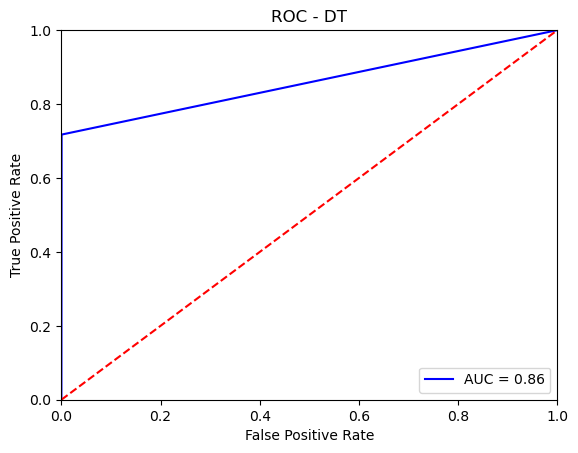

In [159]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

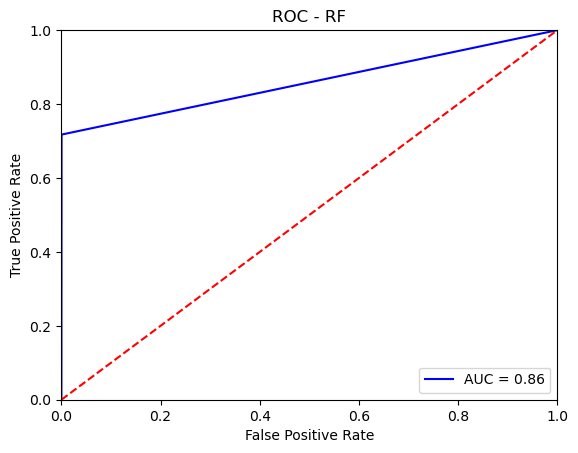

In [161]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

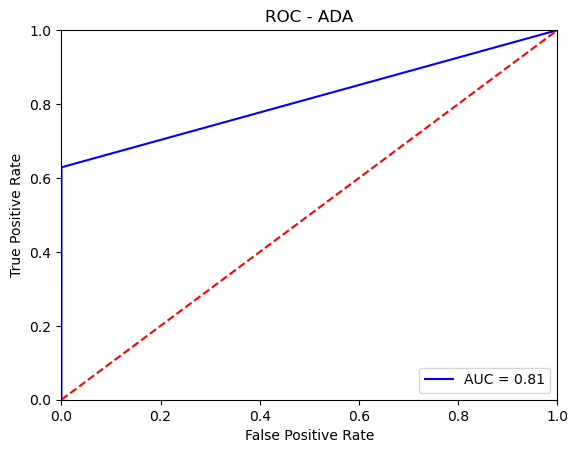

In [160]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_Ad)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - ADA')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Using Sampling & Comparing Result

In [164]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, Y_resampled = smote_enn.fit_resample(X_train, Y_train)

Confusion matrix of Decision Tree model is: 
 [[1541847   46763]
 [    108    1937]]


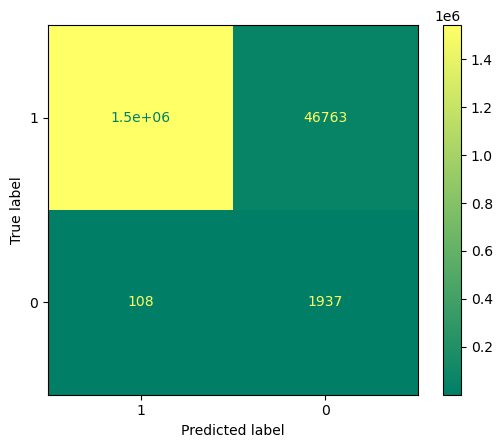

In [167]:
decision_tree1 = DecisionTreeClassifier()
decision_tree1.fit(X_resampled, Y_resampled)

Y_pred_dt1 = decision_tree1.predict(X_test)
decision_tree_score1 = decision_tree1.score(X_test, Y_test) * 100

map = 'summer'
display_labels=['1','0']
cm1 = confusion_matrix(Y_test,Y_pred_dt)
print("Confusion matrix of Decision Tree model is: \n", cm1)

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp1.plot(cmap=cmap)
plt.show()          

In [168]:
classification_report_dt1 = classification_report(Y_test, Y_pred_dt1)
print("Classification Report - Decision Tree")
print(classification_report_dt1)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.97      0.99   1588610
           1       0.04      0.95      0.08      2045

    accuracy                           0.97   1590655
   macro avg       0.52      0.96      0.53   1590655
weighted avg       1.00      0.97      0.98   1590655



### Not much effective as compared.

## Conclusion

### In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.
### Precision value of Adaboost is much better compared to other two models.But in terms of evaluation scores,Random Forest has worked better than other two.


## Questions

### 1. Data cleaning including missing values, outliers and multi-collinearity. 
#### =>Done using all necessary tools.

### 2. Describe your fraud detection model in elaboration. 

#### =>The fraud detection model is a binary classification model that predicts whether a transaction is fraudulent or not. The model is developed using ensemble machine learning algorithms such as decision trees, random forest, and Adaboost. The model is trained on the selected data after doing required data processing and evaluated using metrics such as  precision, recall, and F1-score & AUROC.

### 3. How did you select variables to be included in the model?
#### =>Using Correlation and it's Heatmap so that I can be sure.

### 4. Demonstrate the performance of the model by using best set of tools. 
#### =>Done

### 5. What are the key factors that predict fraudulent customer? 

#### =>From the model :- type of transaction (e.g., payment, transfer, cash out), the amount of money involved, the names and account balances of the originator and recipient of the transaction, and the before-and-after balances of the relevant accounts.

#### Also we should keep a look out on following key factors that can predict a fraudulent customer :High transaction amount,High transaction frequency,Sudden changes in transaction behavior,Unusual transaction locations,Transactions made during non-business hours.

### 6. Do these factors make sense? If yes, How? If not, How not? 

#### =>The factors mentioned above make sense because fraudulent customers tend to make transactions that are significantly different from their normal behavior. For example, a fraudulent customer might make a large transaction or make transactions at unusual locations or during non-business hours. Therefore, these factors are relevant for predicting fraudulent customers.


### 7. What kind of prevention should be adopted while company update its infrastructure?

#### => The following prevention measures can be adopted by the company to prevent fraud:-Monitoring transactions in real-time,Limiting the transaction amount and frequency,Verifying the identity of the customer,Blocking transactions from high-risk locations,Training employees on fraud prevention and keeping a check on both Origin as well as frequent or unusual Destination accounts.


### 8. Assuming these actions have been implemented, how would you determine if they work?

#### =>The effectiveness of the prevention measures can be determined by monitoring the number of fraudulent transactions before and after the implementation of the measures. If the number of fraudulent transactions decreases significantly after the implementation of the measures, then the measures can be considered effective.Also by, Bank sending E-statements,Customers keeping a check of their account activity.,Always keep a log of your payments.